In [2]:
using DataFrames
using DataFramesMeta
using CSV
using SavitzkyGolay
using Plots

In [3]:
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S1_TEX.dat", DataFrame)
#df = CSV.read("\\Users\\royj\\development\\LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat",DataFrame)
#df = CSV.read("\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV17\\5-Accreditation-May23\\CC Output\\TRACS4\\Plates\\Texture\\RAV17_NS_Run_1_A.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV1 resubmission\\ProfileMats\\LONG-PM-NS-R2_rcd_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest4\\PM_Long\\NS\\T4_20230524_094145_GLUK_RCD_L1AB_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest3\\PM_Long\\NS\\T3_20230524_094200_GLUK_RCD_tex.dat", DataFrame)

Row,Chainage,Texture,Dropout
,Float64,Float64,Int64
1,4.0,27.1,0
2,4.001,27.5,0
3,4.002,27.2,0
4,4.003,24.9,0
5,4.004,24.7,0
6,4.005,25.1,0
7,4.006,25.4,0
8,4.007,25.7,0
9,4.008,25.1,0


In [4]:
# minimum_texture = minimum(df.Texture)

# adjustment_value = abs(minimum_texture)

# #df.adjusted_Tex = df.Texture + adjustment_value
# #df.adjusted_Tex = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

# readings_per_metre = length(df.Chainage) / maximum(df.Chainage)
# println("readings per metre ", readings_per_metre)
# hertz = readings_per_metre/2
# println("hertz ", hertz)

In [5]:
# using Plots

# #plotattr(size=(1200,400))
# plot(df.Chainage
#     , df.Texture
    # , size=(1600,400))

In [6]:
# using DSP, Plots
# t = 1:1000; fs =2000; f0 = 60  # sampling and cutoff frequencies
# rawdata = df.Texture
# data_filt = filtfilt(digitalfilter(Lowpass(f0, fs=fs), Butterworth(1)), rawdata)
# plot(rawdata,label="input")
# plot!(data_filt, lc=:red, lw=2,label="filtered using filtfilt", size=(1600,400))

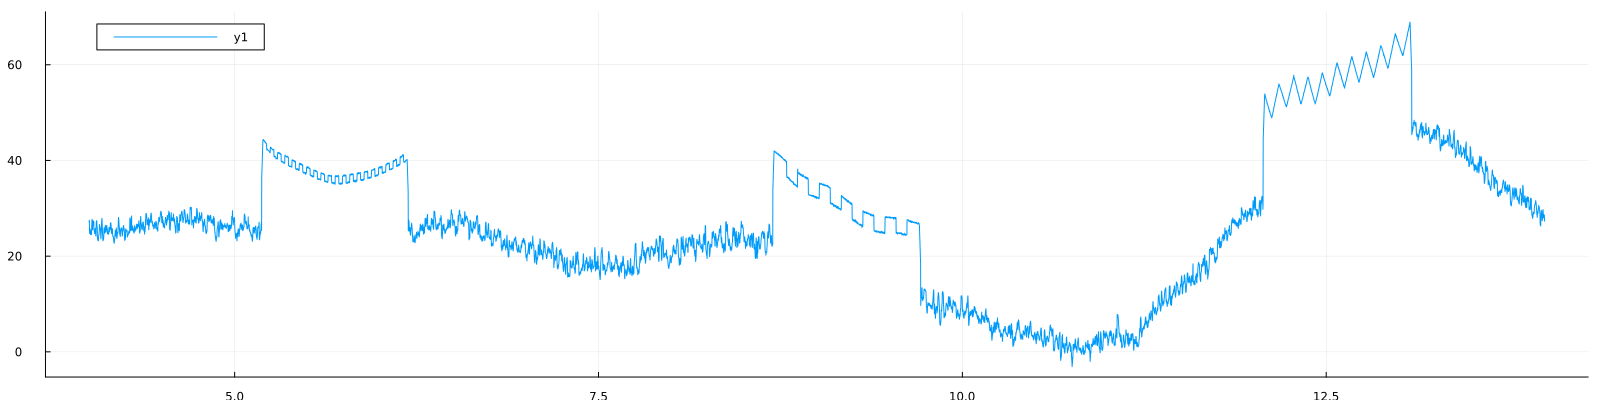

In [7]:
# using SavitzkyGolay
# using Plots
# from matplotlib import pyplot as plt
# import matplotlib as mpl
#sg = savitzky_golay(y::AbstractVector, window_size::Int, order::Int; deriv::Int=0, rate::Real=1.0)

sg = savitzky_golay(df.Texture, 99, 6) 

# print(len(df.Chainage))
# plt.subplots(figsize=(20,5))
# plt.plot(df.Chainage, df.Texture)
#plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))
plot(df.Chainage,df.Texture,size=(1600,400))
#plot!(df.Chainage, sg.y,lc=:red)

In [8]:
# plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))

In [9]:
#filtered_tex = sg.y
df.sg = sg.y

10001-element Vector{Float64}:
 27.100001287991244
 26.890142556863868
 26.70462173778696
 26.569151083216326
 26.46277485399419
 26.3788172224483
 26.28407908132781
 26.17673974161553
 26.0973715748384
 25.999280501634487
 25.906607761076405
 25.815120831737236
 25.7286530515466
  ⋮
 28.32315642365916
 28.228341038129987
 28.13424127039922
 28.03209676764185
 27.934893613771116
 27.845473774842684
 27.7549263580324
 27.66332321193444
 27.57551971921481
 27.485890413629726
 27.40277181599674
 27.300000290409915

In [10]:
# Need to figure out where the input signal increases or decreases by a significant value, find the absolute change between the data readings.
# create abs_data_diff

using ShiftedArrays: lead
df_diff_calc = transform(df, :sg => (x -> x - lead(x,3)) => :data_diff)
transform!(df_diff_calc, :data_diff => (ByRow(x -> abs(x)) => :abs_data_diff))


Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64?
1,4.0,27.1,0,27.1,0.53085,0.53085
2,4.001,27.5,0,26.8901,0.427368,0.427368
3,4.002,27.2,0,26.7046,0.325805,0.325805
4,4.003,24.9,0,26.5692,0.285072,0.285072
5,4.004,24.7,0,26.4628,0.286035,0.286035
6,4.005,25.1,0,26.3788,0.281446,0.281446
7,4.006,25.4,0,26.2841,0.284799,0.284799
8,4.007,25.7,0,26.1767,0.270132,0.270132
9,4.008,25.1,0,26.0974,0.282251,0.282251


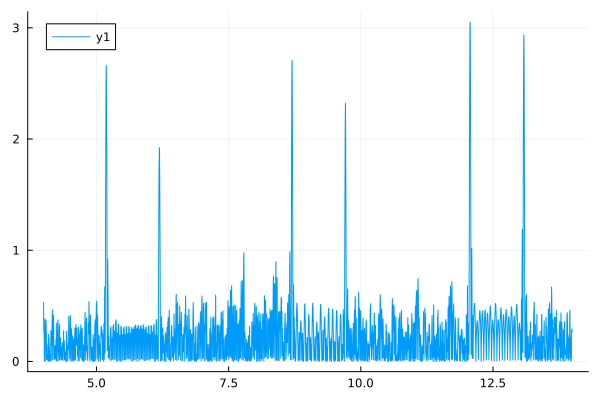

In [11]:
plot(df_diff_calc.Chainage, df_diff_calc.abs_data_diff)


In [12]:
threshold = 1.5  # Given threshold
exceed_points = Int[]
@transform!(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 1))
prev_val = df_diff_calc[1, :abs_data_diff]

for i in 1:5:length(df_diff_calc[!,:abs_data_diff])
    
    current_val = df_diff_calc[i, :abs_data_diff]

    if current_val > threshold
        push!(exceed_points, i)
    end

end

println("Points at which the difference in values exceeds $threshold: are $exceed_points")

Points at which the difference in values exceeds 1.5: are [1176, 1181, 1186, 1191, 1196, 2186, 2191, 2196, 4691, 4696, 4701, 4706, 4711, 5701, 5706, 5711, 5716, 8056, 8061, 8066, 8071, 8076, 9076, 9081, 9086, 9091, 9096]


In [13]:
#println(exceed_points)

plate_boundaries = []
differences = diff(exceed_points)
#plate_start = exceed_points[1]

for i in 1:length(differences)
    if differences[i] > 90 && differences[i] <= 1100
        push!(plate_boundaries, exceed_points[i])
        push!(plate_boundaries, exceed_points[i+1])
        #plate_start=0
    end
end

print(plate_boundaries)

Any[1196, 2186, 4711, 5701, 8076, 9076]

In [14]:
# 
plate1 = df_diff_calc[plate_boundaries[1]:plate_boundaries[2],:]

plate2 = df_diff_calc[plate_boundaries[3]:plate_boundaries[4],:]

plate3 = df_diff_calc[plate_boundaries[5]:plate_boundaries[6],:]
# plot(plate1.Chainage, plate1.Texture)

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,12.075,52.1,0,48.741,-2.35922,2.35922
2,12.076,53.1,0,49.5669,-2.19587,2.19587
3,12.077,53.4,0,50.3603,-1.98165,1.98165
4,12.078,53.9,0,51.1002,-1.75005,1.75005
5,12.079,53.8,0,51.7627,-1.52571,1.52571
6,12.08,53.7,0,52.342,-1.30999,1.30999
7,12.081,53.6,0,52.8503,-1.08818,1.08818
8,12.082,53.4,0,53.2885,-0.855116,0.855116
9,12.083,53.3,0,53.652,-0.611442,0.611442


In [15]:
# plate2 = df_diff_calc[plate_boundaries[3]:plate_boundaries[4],:]

# plot(plate2.Chainage, plate2.Texture)

In [16]:
# plate3 = df_diff_calc[plate_boundaries[5]:plate_boundaries[6],:]

# plot(plate3.Chainage, plate3.Texture)

In [17]:
using Statistics
using CurveFit

function texture_plate_analysis(plate, poly_const)

    #using CurveFit
    #using Statistics

    poly = curve_fit(Polynomial, plate.Chainage, plate.Texture, poly_const)
    plate.basepoly = poly.(plate.Chainage)

    # the corrected values should be a flat plot centered on the mean by subtracting the poly from the actuals

    plate.corrected = plate.Texture - plate.basepoly
    plate_average = mean(plate.corrected)

    #calculate the mean values of the corrected values above the mean
    
    mean_above_average = mean(plate[plate[!,:corrected].>plate_average,:].corrected)
    mean_below_average = mean(plate[plate[!,:corrected].<plate_average,:].corrected)
    mean_plate_height = diff([mean_above_average,mean_below_average])
    
    # Calculate the number of rows for the middle 90%

    n_rows = nrow(plate)
    start_idx = Int(round(0.1 * n_rows))
    end_idx = Int(round(0.9 * n_rows))

    # Select the middle 90% of the rows as the poly line trends dont work at the ends of the range !
    # The poly line tends toward 0 to make it match !

    middle_90_percent_df = plate[start_idx:end_idx, :]
    middle_average = mean(middle_90_percent_df.corrected)
    middle_mean_above_average = mean(middle_90_percent_df[middle_90_percent_df[!,:corrected].>middle_average,:].corrected)
    middle_mean_below_average = mean(middle_90_percent_df[middle_90_percent_df[!,:corrected].<middle_average,:].corrected)

    #println(plate_average, " ave ", mean_above_average, " mean_above_average ", mean_below_average, " below avg")

    #println("difference ", diff([mean_above_average, mean_below_average]))

    #println(middle_average, " ave ", middle_mean_above_average, " middle_mean_above_average ", middle_mean_below_average, " middle below avg")

    plate_pattern_height = abs(diff([middle_mean_above_average, middle_mean_below_average])[1]) # abs(mean_plate_height[1]))
    #println("Height ", plate_pattern_height)
    flush(stdout)

    passes_through_zero = []

    for i in 1:(nrow(middle_90_percent_df)-1)
        first_val = middle_90_percent_df[i, :corrected]
        second_val = middle_90_percent_df[i+1, :corrected]
        if (first_val>middle_average) & (second_val< middle_average) ||
            (first_val<middle_average) &(second_val>middle_average)
            append!(passes_through_zero, i)
        end
    end

    #make sure that the values passing through zero are at least 4 apart. This means any noise does not affect the readings
    
    filtered_passes_through_zero = []
    for i in 1:(length(passes_through_zero) - 1)
        if (passes_through_zero[i+1] - passes_through_zero[i]) > 4
            push!(filtered_passes_through_zero, passes_through_zero[i])
            #
        end
    end

    # TODO: rework this to calculate on the chainage which corresponds to passes through zero
    # as the readings are not guaranteed to be every one millimetre,

    plate_pattern_length = mean(diff(filtered_passes_through_zero))
    #println("Length ", (plate_pattern_length))

    return (abs(plate_pattern_height[1])), (plate_pattern_length) #, filtered_passes_through_zero

end


texture_plate_analysis (generic function with 1 method)

In [18]:
plate1_height, plate1_length = texture_plate_analysis(plate1,14)

plate2_height, plate2_length = texture_plate_analysis(plate2,14)

plate3_height, plate3_length= texture_plate_analysis(plate3,14)

println("plate1 Height ", plate1_height, " Length ", (plate1_length * 2))
# flush(stdout)

println("plate2 Height ", plate2_height, " Length ", (plate2_length * 2))
# flush(stdout)

println("plate3 Height ", (plate3_height *2), " Length ", (plate3_length * 2))
# flush(stdout)

plate1 Height 1.472267964754311 Length 49.6
plate2 Height 3.094969738736754 Length 150.25
plate3 Height 6.054012340450808 Length 99.71428571428571


In [19]:
# plate3_height = texture_plate_analysis(plate3,14)

# # as this is the triangle plate double the height

# plate3_height = plate3_height * 2
# print(plate3_height)
# flush(stderr)

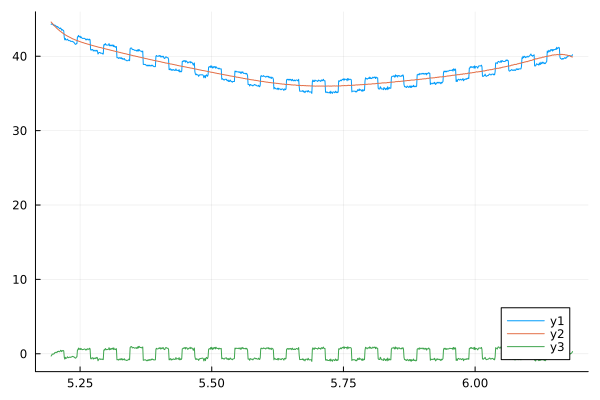

In [20]:
using CurveFit
poly = curve_fit(Polynomial, plate1.Chainage, plate1.Texture, 14)
plate1.basepoly = poly.(plate1.Chainage)

plate1.corrected = plate1.Texture - plate1.basepoly

plot(plate1.Chainage, plate1.Texture)
plot!(plate1.Chainage, plate1.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate1.Chainage, plate1.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [21]:
# plate1_height, plate1_length = texture_plate_analysis(plate1,14)

# plate2_height, plate2_length = texture_plate_analysis(plate2,14)

# plate3_height, plate3_length= texture_plate_analysis(plate3,14)

# #println(plate1_height, plate1_length)
# # flush(stdout)

# println(plate2_height, plate2_length)
# flush(stdout)

# println(plate3_height, plate3_length)
# flush(stdout)

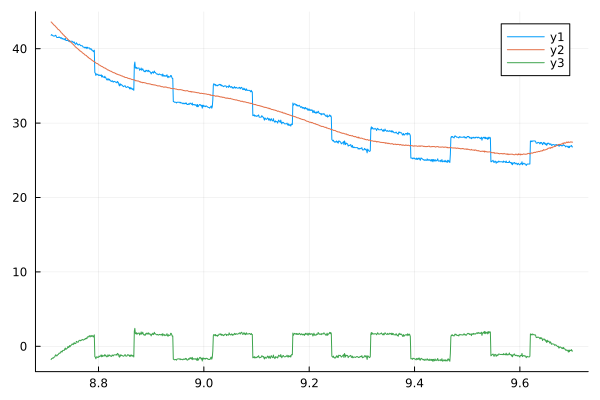

In [22]:
poly = curve_fit(Polynomial, plate2.Chainage, plate2.Texture, 14)
plate2.basepoly = poly.(plate2.Chainage)

plate2.corrected = plate2.Texture - plate2.basepoly

plot(plate2.Chainage, plate2.Texture)
plot!(plate2.Chainage, plate2.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate2.Chainage, plate2.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [23]:
# # find the average of the corrected data
# using Statistics
# plate2_average = mean(plate2.corrected)
# println(plate2_average)
# flush(stdout)
# #calculate the mean values of the corrected values above the mean

# mean_above_average = mean(plate2[plate2[!,:corrected].>plate2_average,:].corrected)
# println(mean_above_average)
# flush(stdout)
# #plate1[plate1[!,:corrected].>plate1_average,:]
# mean_below_average = mean(plate2[plate2[!,:corrected].<plate2_average,:].corrected)
# print(mean_below_average)
# flush(stdout)

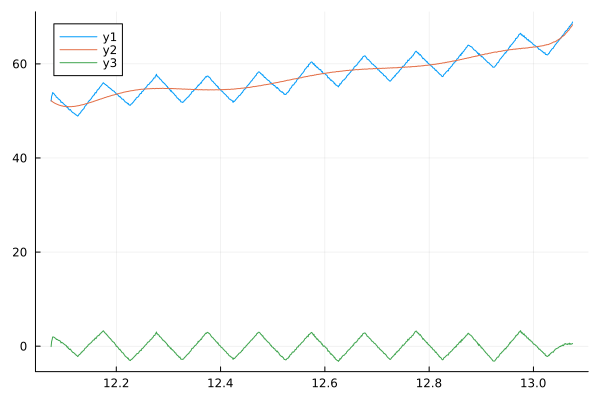

In [24]:
using CurveFit

poly = curve_fit(Polynomial, plate3.Chainage, plate3.Texture,14)
plate3.basepoly = poly.(plate3.Chainage)

plate3.corrected = plate3.Texture - plate3.basepoly
#plate3.expcorrected = plate3.Texture - plate3.baseexp

plot(plate3.Chainage, plate3.Texture)
plot!(plate3.Chainage, plate3.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate3.Chainage, plate3.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [24]:
# using Statistics
# plate3_average = mean(plate3.corrected)
# println(plate3_average)
# flush(stdout)
# #calculate the mean values of the corrected values above the overall mean

# mean_above_average = mean(plate3[plate3[!,:corrected].>plate3_average,:].corrected)
# println(mean_above_average)
# flush(stdout)

# # and below mean
# #plate1[plate1[!,:corrected].>plate1_average,:]
# mean_below_average = mean(plate3[plate3[!,:corrected].<plate3_average,:].corrected)
# print(mean_below_average)
# flush(stdout)

# abs(diff([mean_above_average, mean_below_average])[1]*2)

In [164]:
# plate3_average

In [165]:
# mean_below_average

In [166]:
# @transform!(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 1))

# df_diff_calc

In [167]:
# threshold = 1.5 # Given threshold
# exceed_points = [] # will be a list of rows near the edges of the plate.

# prev_val = df_diff_calc[1,:abs_data_diff]
# end_of_df = length(df_diff_calc[!,:abs_data_diff])
# println("end ",end_of_df)
# println("first previous ",prev_val)
# @transform(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 0))
# #loop_range = range(1, 15, end_of_df)
# # outer loop means that only the row numbers vivisable by 15 are processed
# for i in 1:end_of_df
#   # current_val = df.iloc[i]['Texture'] 
#   if i % 12 == 0
#     #println("pos ", i)
  
#   #int_i = 
  
#   current_val = df_diff_calc[i, :abs_data_diff]
#   print(current_val)
#     if abs(current_val - prev_val) > threshold
#       append!(exceed_points, i)
#       #i= i + 700
#       prev_val = current_val
#     #
#     end
#   end
# end
# println("Points at which the difference in values exceeds $threshold are $exceed_points")

In [168]:
# threshold = 22 # Given threshold
# exceed_points = []
# prev_val = df[1,:Texture]
# end_of_df = length(df[!,:Texture])
# println("end ",end_of_df)
# println("first tex ",prev_val)
# #loop_range = range(1, 15, end_of_df)
# # outer loop means that only the row numbers vivisable by 15 are processed
# for i in 1:end_of_df
#   # current_val = df.iloc[i]['Texture'] 
#   if i % 12 == 0
#     #println("pos ", i)
  
#   #int_i = 
  
#   current_val = df[i, :Texture]
#     if abs(current_val - prev_val) > threshold
#       append!(exceed_points, i)
#       #i= i + 700
#       prev_val = current_val
#     #
#     end
#   end
# end
# println("Points at which the difference in values exceeds $threshold are $exceed_points")

In [169]:
# # return the rows where the difference is greater than a given value
# potential_plates = subset(df_diff_calc, :abs_data_diff => ByRow(abs_data_diff -> abs_data_diff > 2), skipmissing=true)
# #
# #textureΔ =
# #mapcols(data_diff -> df_diff_calc)

In [170]:
# #length_of_df = length(potential_plates[!,1])
# length_of_df = length(df_diff_calc[!,1])
# println(length_of_df)
# df_diff_calc.data_diff[ismissing.(df_diff_calc.data_diff)] .= 0

# # global df_diff_calc
# i=1
# # global plate_start =1
# # global plate_end= 2
# # global plate_position = 1

# while i <= length_of_df

#     println(i)
#     #plate_position = i
#     #plate_start=1
#     #plate_end=1
#     abs_data_diff = df_diff_calc[i,:abs_data_diff]
#     #int_data_diff: Float64 = df_diff_calc[i,:data_diff]
#     int_data_diff = df_diff_calc[i,:data_diff]
#     #println(plate_position) # , "DATA DIFF ",int_data_diff)

#     if ismissing(int_data_diff) int_data_diff = 0 end

#     print(int_data_diff)

#     if int_data_diff <= -2.0
#         plate_start = i
#         println("row ", i, " data_diff ",int_data_diff)
#         i = i + 800
#     # else
#     #     i+=1
#         #continue
#     end

    # if int_data_diff >= 2
    #     plate_end = i
    #     i =i +1000
    #     println( "start ", plate_start)
    #     println("End ", plate_end)
    # end
#     global i +=1
    
# end


In [171]:
# while i <= 3
#     println(i)
#     global i += 1
# end
# println(i)

In [172]:
# i=1

# while i <= 3
#     println(i)
#     global i += 1
# end
# println(i)

In [173]:
#length_of_df

In [174]:
#df_diff_calc

In [175]:
# # find the regression line for plate 1
# using GLM
# model = lm(@formula(Texture ~ 1 + Chainage + Chainage^2), plate1)  # Note how the formula looks exactly like the model you want to build
# plot(plate1.Chainage, predict(model, plate1), label="model")
# plot!(plate1.Chainage, plate1.Texture)

# plate1.baseline = predict(model,plate1)

# plate1.corrected = plate1.Texture - plate1.baseline

# plot!(plate1.Chainage, plate1.corrected)
